# Neural Networks and Deep Learning

## Clothes Fashion Classification Project

Dataset: https://github.com/alexeygrigorev/clothing-dataset-small.git

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader

In [1]:
# Download the dataset
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 16.66 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (3783/3783), done.


## Loading and Preprocessing Images

Images are represented as 3D arrays:

- Height × Width × Channels
- Channels: RGB (Red, Green, Blue)
- Each channel: 8 bits (0-255 values)

![imge](./img/image.png)

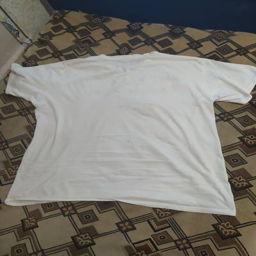

In [28]:
# Load an image
img = Image.open(
    "clothing-dataset-small/train/t-shirt/0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg"
)

img.resize((256, 256))

In [29]:
# Convert to numpy array
img_array = np.array(img)
print("Image shape:", img_array.shape)

Image shape: (533, 400, 3)


## Pre-trained Models

Instead of training from scratch, we'll use a model pre-trained on ImageNet (1.4M images, 1000 classes).

Why use [pre-trained models](https://docs.pytorch.org/vision/stable/models.html)?

- Already learned to recognize edges, textures, shapes
- Saves training time
- Works well even with small datasets
- Better performance than training from scratch


**Using MobileNetV2**

In [30]:
# Load pre-trained model
base_model = models.mobilenet_v2(weights="IMAGENET1K_V2")
base_model.eval()  # Set to evaluation mode

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [31]:
preprocess = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

In [32]:
preprocess(img)

tensor([[[-0.2342, -0.2342, -0.1486,  ..., -0.8507, -0.3712, -0.0972],
         [-0.1999, -0.1999, -0.1314,  ..., -1.1589, -0.9534, -0.5082],
         [-0.1999, -0.1657, -0.1486,  ..., -1.0562, -1.1589, -1.0390],
         ...,
         [-0.2856, -0.2513, -0.2342,  ..., -0.2856, -0.2513, -0.1828],
         [-0.2513, -0.2342, -0.2342,  ..., -0.2513, -0.2856, -0.2171],
         [-0.2513, -0.2342, -0.2342,  ..., -0.2171, -0.2513, -0.2342]],

        [[-0.2500, -0.2500, -0.1625,  ..., -0.9153, -0.4426, -0.1975],
         [-0.2150, -0.2150, -0.1450,  ..., -1.1429, -0.9678, -0.5651],
         [-0.2150, -0.1800, -0.1625,  ..., -1.0028, -1.1253, -1.0553],
         ...,
         [-0.3901, -0.3550, -0.3375,  ..., -0.4251, -0.3901, -0.3200],
         [-0.3550, -0.3375, -0.3375,  ..., -0.3901, -0.4251, -0.3550],
         [-0.3550, -0.3375, -0.3375,  ..., -0.3550, -0.3901, -0.3550]],

        [[-0.2184, -0.2184, -0.1312,  ..., -0.9156, -0.4624, -0.2707],
         [-0.1835, -0.1835, -0.1138,  ..., -1

In [33]:
# Making the prediction
x = preprocess(img)
batch_t = torch.unsqueeze(x, 0)  # Create a mini-batch as expected by the model

with torch.no_grad():  # Disable gradient calculation
    out = base_model(batch_t)

_, indices = torch.sort(out, descending=True)
indices[0][:5]  # Top 5 class predictions

tensor([610, 750, 841, 529, 842])

In [18]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt -O imagenet_classes.txt


--2025-11-21 19:44:53--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10,23K  --.-KB/s    in 0,002s  

2025-11-21 19:44:54 (6,18 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [34]:
with open("imagenet_classes.txt") as f:
    classes = [line.strip() for line in f.readlines()]

# Get the top 5 class names
top5_classes = [classes[idx] for idx in indices[0][:5]]

print("Top 5 Predictions:")
for i, class_name in enumerate(top5_classes):
    print(f"{i+1}: {class_name}")

Top 5 Predictions:
1: jersey
2: quilt
3: sweatshirt
4: diaper
5: swimming trunks


Key concepts:

- Input size: MobileNetV2 expects 224×224 images (Xception uses 299×299)
- Normalization: Images scaled with ImageNet mean and std
- Batch size: Number of images processed together
- Batch dimension: Shape (batch_size, channels, height, width) - e.g., (1, 3, 224, 224)

## Convolutional Neural Networks

A [Convolutional Neural Network (CNN)](https://www.geeksforgeeks.org/machine-learning/introduction-convolution-neural-network/) is an advanced version of [artificial neural networks (ANNs)](https://www.geeksforgeeks.org/artificial-intelligence/artificial-neural-networks-and-its-applications/), primarily designed to extract features from grid-like matrix datasets.

Key Components:

1. Convolutional Layer: Extracts features using filters

    - Applies filters (e.g., 3×3, 5×5) to detect patterns
    - Creates feature maps (one per filter)
    - Detects edges, textures, shapes

2. ReLU Activation: Introduces non-linearity

    - f(x) = max(0, x)
    - Sets negative values to 0
    - Helps network learn complex patterns

3. Pooling Layer: Down-samples feature maps

    - Reduces spatial dimensions
    - Max pooling: takes maximum value in a region
    - Makes features more robust to small translations

4. Fully Connected (Dense) Layer: Final classification

    - Flattens 2D feature maps to 1D vector
    - Connects to output classes

![image2](./img/image2.png)

## Transfer Learning

[Transfer learning](https://www.geeksforgeeks.org/machine-learning/ml-introduction-to-transfer-learning/) is a machine learning technique where a model trained on one task (ImageNet) is repurposed as the foundation for a second task (clothing classification). This approach is beneficial when the second task is related to the first or when data for the second task is limited.

Approach:

1. Load pre-trained model (feature extractor)
2. Remove original classification head
3. Freeze convolutional layers
4. Add custom layers for our task
5. Train only the new layers

### Custom Dataset Class

In [35]:
class ClothingDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = sorted(os.listdir(data_dir))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}

        for label_name in self.classes:
            label_dir = os.path.join(data_dir, label_name)
            for img_name in os.listdir(label_dir):
                self.image_paths.append(os.path.join(label_dir, img_name))
                self.labels.append(self.class_to_idx[label_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

### Simple Preprocessing

In [36]:
input_size = 224

# ImageNet normalization values
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Simple transforms - reisize, to tensor, normalize
train_transforms = transforms.Compose(
    [
        transforms.Resize((input_size, input_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std),
    ]
)

val_transforms = transforms.Compose(
    [
        transforms.Resize((input_size, input_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std),
    ]
)

### Create DataLoaders

In [37]:
train_dataset = ClothingDataset(
    data_dir="./clothing-dataset-small/train", transform=train_transforms
)

val_dataset = ClothingDataset(
    data_dir="./clothing-dataset-small/validation", transform=val_transforms
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

### Build the Model

In [38]:
class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()

        # Load pre-trained model
        self.base_model = models.mobilenet_v2(weights="IMAGENET1K_V2")

        # Freeze base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Remove original classifier
        self.base_model.classifier = nn.Identity()

        # Add custom layers
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.output_layer = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = self.output_layer(x)
        return x

### Train the model

In [39]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS device.")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA device.")
else:
    device = torch.device("cpu")
    print("MPS device not found, using CPU.")

model = ClothingClassifierMobileNet(num_classes=10)
model.to(device)

optimizer = optim.Adam(model.output_layer.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

Using MPS device.


In [40]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # iterate over training data
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # zero the parameter gradients to prevent accumulation
        optimizer.zero_grad()

        # forward
        outputs = model(images)

        # calculate loss
        loss = criterion(outputs, labels)

        # backward + optimize
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item()

        # get predictions
        _, preds = torch.max(outputs.data, 1)

        # update correct predictions count
        total_predictions += labels.size(0)
        correct_predictions += (preds == labels).sum().item()

    # calculate epoch loss and accuracy
    epoch_accuracy = correct_predictions / total_predictions
    epoch_loss = running_loss / len(train_loader)
    print(
        f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.4f}"
    )

    # Validation phase
    model.eval()  # set model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    # disable gradient calculation for validation
    with torch.no_grad():
        # iterate over validation data
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, preds = torch.max(outputs.data, 1)

            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    # calculate validation loss and accuracy
    val_loss /= len(val_loader)
    val_accuracy = val_correct / val_total
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/10, Training Loss: 1.6113, Training Accuracy: 0.4925
Validation Loss: 1.2324, Validation Accuracy: 0.6334
Epoch 2/10, Training Loss: 1.0780, Training Accuracy: 0.6871
Validation Loss: 1.0131, Validation Accuracy: 0.7038
Epoch 3/10, Training Loss: 0.8827, Training Accuracy: 0.7490
Validation Loss: 0.9126, Validation Accuracy: 0.7390
Epoch 4/10, Training Loss: 0.7573, Training Accuracy: 0.7904
Validation Loss: 0.8663, Validation Accuracy: 0.7449
Epoch 5/10, Training Loss: 0.6961, Training Accuracy: 0.7917
Validation Loss: 0.8123, Validation Accuracy: 0.7537
Epoch 6/10, Training Loss: 0.6521, Training Accuracy: 0.8080
Validation Loss: 0.8000, Validation Accuracy: 0.7742
Epoch 7/10, Training Loss: 0.6027, Training Accuracy: 0.8253
Validation Loss: 0.7517, Validation Accuracy: 0.7713
Epoch 8/10, Training Loss: 0.5604, Training Accuracy: 0.8442
Validation Loss: 0.7607, Validation Accuracy: 0.7654
Epoch 9/10, Training Loss: 0.5292, Training Accuracy: 0.8462
Validation Loss: 0.7441, Va

It's a lower-level framework, that's why we need to implement some of these things like calculating accuracy on validation.

The line optimizer.zero_grad() is crucial in the training loop.

In PyTorch, gradients are accumulated by default. This means that if you don't zero the gradients before calculating the gradients for the current batch, the gradients from the previous batch will be added to the gradients of the current batch. This would lead to incorrect updates to your model's parameters.

By calling optimizer.zero_grad(), you clear out the old gradients, ensuring that the gradients calculated during the loss.backward() call are only based on the current batch of data. This is essential for the optimizer to take the correct step during optimizer.step().

model.train() and model.eval() are needed to manage the behavior of certain layers during training and evaluation.

model.train() sets the model to training mode. In training mode, layers like Dropout and BatchNorm behave differently. Dropout layers are active (randomly dropping neurons), and BatchNorm layers update their running statistics (mean and variance) based on the current batch.

model.eval() sets the model to evaluation mode. In evaluation mode, Dropout layers are inactive (they pass through all neurons), and BatchNorm layers use their accumulated running statistics instead of the current batch statistics. This ensures consistent behavior during inference and prevents randomness from affecting the evaluation results.



In [41]:
def train_and_evaluate_model(
    model, train_loader, val_loader, optimizer, criterion, num_epochs, device
):
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        # iterate over training data
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # zero the parameter gradients to prevent accumulation
            optimizer.zero_grad()

            # forward
            outputs = model(images)

            # calculate loss
            loss = criterion(outputs, labels)

            # backward + optimize
            loss.backward()
            optimizer.step()

            # accumulate loss
            running_loss += loss.item()

            # get predictions
            _, preds = torch.max(outputs.data, 1)

            # update correct predictions count
            total_predictions += labels.size(0)
            correct_predictions += (preds == labels).sum().item()

        # calculate epoch loss and accuracy
        epoch_accuracy = correct_predictions / total_predictions
        epoch_loss = running_loss / len(train_loader)
        print(
            f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.4f}"
        )

        # Validation phase
        model.eval()  # set model to evaluation mode
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        # disable gradient calculation for validation
        with torch.no_grad():
            # iterate over validation data
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = torch.max(outputs.data, 1)

                val_total += labels.size(0)
                val_correct += (preds == labels).sum().item()

        # calculate validation loss and accuracy
        val_loss /= len(val_loader)
        val_accuracy = val_correct / val_total
        print(
            f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}"
        )

### Tuning the Learning Rate

The learning rate controls how much to update model weights during training. It's one of the most important hyperparameters.

Analogy: Reading speed

- Too fast: Skip details, poor understanding (may not converge)
- Too slow: Never finish the book (training takes too long)
- Just right: Good comprehension and efficiency

Experimentation approach:

- Try multiple values: [0.0001, 0.001, 0.01, 0.1]
- Train for a few epochs each
- Compare validation accuracy
- Choose the rate with best performance and smallest train/val gap


In [42]:
def make_model(device, learning_rate=0.01):
    model = ClothingClassifierMobileNet(num_classes=10)
    model.to(device)

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    return model, optimizer, criterion

In [ ]:
learning_rate = [0.0001, 0.001, 0.01, 0.1]

for lr in learning_rate:
    print(f"\nTraining with learning rate: {lr}")
    model, optimizer, criterion = make_model(device, learning_rate=lr)
    train_and_evaluate_model(
        model,
        train_loader,
        val_loader,
        optimizer,
        criterion,
        num_epochs,
        device=device,
    )


Training with learning rate: 0.0001
Epoch 1/10, Training Loss: 2.1055, Training Accuracy: 0.2454
Validation Loss: 1.9643, Validation Accuracy: 0.2581
Epoch 2/10, Training Loss: 1.8958, Training Accuracy: 0.3230
Validation Loss: 1.8213, Validation Accuracy: 0.3578
Epoch 3/10, Training Loss: 1.7580, Training Accuracy: 0.4149
Validation Loss: 1.6952, Validation Accuracy: 0.4516
Epoch 4/10, Training Loss: 1.6416, Training Accuracy: 0.4785
Validation Loss: 1.5980, Validation Accuracy: 0.5249
Epoch 5/10, Training Loss: 1.5415, Training Accuracy: 0.5238
Validation Loss: 1.5026, Validation Accuracy: 0.5396
Epoch 6/10, Training Loss: 1.4558, Training Accuracy: 0.5753
Validation Loss: 1.4309, Validation Accuracy: 0.5777
Epoch 7/10, Training Loss: 1.3836, Training Accuracy: 0.5952
Validation Loss: 1.3744, Validation Accuracy: 0.6129
Epoch 8/10, Training Loss: 1.3201, Training Accuracy: 0.6242
Validation Loss: 1.3241, Validation Accuracy: 0.6070
Epoch 9/10, Training Loss: 1.2658, Training Accurac

### Model Checkpointing

Checkpointing saves the model during training to:

- Keep the best performing model
- Resume training if interrupted
- Avoid losing progress

In [26]:
def train_and_evaluate_model_with_checkpoint(
    model, train_loader, val_loader, optimizer, criterion, num_epochs, device
):
    best_val_accuracy = 0.0  # Initialize variable to track the best validation accuracy

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        # iterate over training data
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # zero the parameter gradients to prevent accumulation
            optimizer.zero_grad()

            # forward
            outputs = model(images)

            # calculate loss
            loss = criterion(outputs, labels)

            # backward + optimize
            loss.backward()
            optimizer.step()

            # accumulate loss
            running_loss += loss.item()

            # get predictions
            _, preds = torch.max(outputs.data, 1)

            # update correct predictions count
            total_predictions += labels.size(0)
            correct_predictions += (preds == labels).sum().item()

        # calculate epoch loss and accuracy
        epoch_accuracy = correct_predictions / total_predictions
        epoch_loss = running_loss / len(train_loader)
        print(
            f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.4f}"
        )

        # Validation phase
        model.eval()  # set model to evaluation mode
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        # disable gradient calculation for validation
        with torch.no_grad():
            # iterate over validation data
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = torch.max(outputs.data, 1)

                val_total += labels.size(0)
                val_correct += (preds == labels).sum().item()

        # calculate validation loss and accuracy
        val_loss /= len(val_loader)
        val_accuracy = val_correct / val_total
        print(
            f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}"
        )

    # Save the model checkpoint
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        checkpoint_path = f"mobilenet_v2_{epoch+1:02d}_{val_accuracy:.3f}.pth"
        torch.save(model.state_dict(), checkpoint_path)
        print(
            f"Model checkpoint {checkpoint_path} saved with validation accuracy: {best_val_accuracy:.4f}"
        )

### Adding Inner Layers

We can add intermediate dense layers between feature extraction and output:

In [ ]:
class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, size_inner=100, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()

        # Load pre-trained model
        self.base_model = models.mobilenet_v2(weights="IMAGENET1K_V2")

        # Freeze base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Remove original classifier
        self.base_model.classifier = nn.Identity()

        # Add custom layers
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.inner_layer = nn.Linear(1280, size_inner)  # New inner layer
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(size_inner, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = self.inner_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

Update make_model:

In [ ]:
def make_model(learning_rate=0.001, size_inner=100):
    model = ClothingClassifierMobileNet(num_classes=10, size_inner=size_inner)
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer, criterion

Key points:

- Inner layer uses ReLU activation
- Output layer has no activation (logits)
- CrossEntropyLoss applies softmax internally

In [ ]:
# TODO: Train the model different inner layer sizes

### Dropout Regularization

[Dropout Regularization](https://www.geeksforgeeks.org/deep-learning/dropout-regularization-in-deep-learning/) randomly drops neurons during training to prevent overfitting.


**How it works:**

- Training: randomly set fraction of activations to 0
- Inference: use all neurons (dropout disabled automatically)
- Creates ensemble effect

**Benefits:**

- Prevents relying on specific features
- Forces learning robust patterns
- Reduces overfitting

In [ ]:
class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, size_inner=100, droprate=0.2, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()

        self.base_model = models.mobilenet_v2(weights="IMAGENET1K_V1")

        for param in self.base_model.parameters():
            param.requires_grad = False

        self.base_model.classifier = nn.Identity()

        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))
        self.inner = nn.Linear(1280, size_inner)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(droprate)  # Add dropout
        self.output_layer = nn.Linear(size_inner, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.inner(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.output_layer(x)
        return x

In [ ]:
def make_model(learning_rate=0.001, size_inner=100, droprate=0.2):
    model = ClothingClassifierMobileNet(
        num_classes=10, size_inner=size_inner, droprate=droprate
    )

    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

In [ ]:
# TODO: Train the model with dropout regularization